## Importing Libraries

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler

# Problem Statement

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


 

## Importing Dataset

In [61]:
# Load the Airlines dataset
airlines = pd.read_csv('EastWestAirlines.csv')

## EDA

### Statistical_Aanlysis

In [62]:
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [63]:
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [64]:
airlines.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [65]:
airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [66]:
airlines.shape

(3999, 12)

In [67]:
# Display basic information about the dataset
print(airlines.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [68]:
# Checking for null values
airlines.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

<Axes: >

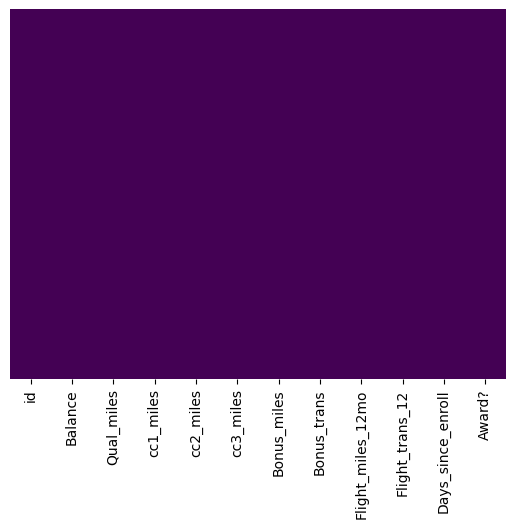

In [96]:
sns.heatmap(airlines.isnull(),yticklabels=False,cbar=False,cmap='viridis')

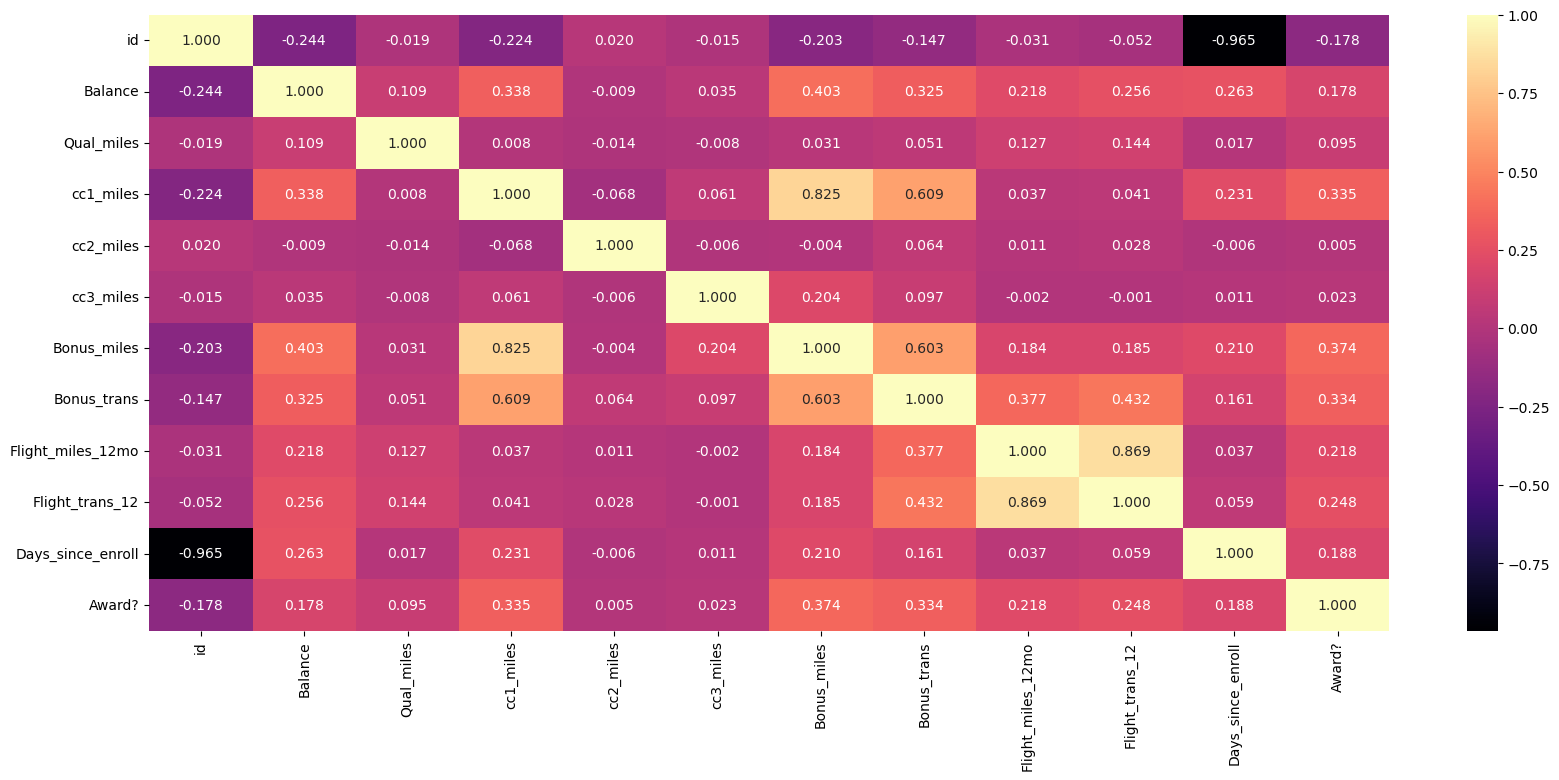

In [97]:
# Heatmap for correlaltion
plt.figure(figsize = (20, 8));
sns.heatmap(airlines.corr(),cmap='magma', annot=True, fmt='.3f')
plt.show()

In [69]:
airlines.rename(columns={'ID#':'id'}, inplace=True)
airlines.columns[0]

'id'

In [73]:
# Dropping the id column
air2=airlines.drop(['id'],axis=1)
air2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


## Normalising the data

In [75]:
scaler=MinMaxScaler(feature_range=(0,1))
airlines_N=scaler.fit_transform(air2)
print(airlines_N[0:5,:])

[[1.65077268e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 6.59878264e-04 1.16279070e-02 0.00000000e+00
  0.00000000e+00 8.43742464e-01 0.00000000e+00]
 [1.12878760e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 8.15366820e-04 2.32558140e-02 0.00000000e+00
  0.00000000e+00 8.39884254e-01 0.00000000e+00]
 [2.42568502e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.56360809e-02 4.65116279e-02 0.00000000e+00
  0.00000000e+00 8.47841813e-01 0.00000000e+00]
 [8.66709916e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.89620191e-03 1.16279070e-02 0.00000000e+00
  0.00000000e+00 8.37955148e-01 0.00000000e+00]
 [5.73379993e-02 0.00000000e+00 7.50000000e-01 0.00000000e+00
  0.00000000e+00 1.64211085e-01 3.02325581e-01 6.73978648e-02
  7.54716981e-02 8.35905474e-01 1.00000000e+00]]


## Hierarchichal Clustering

In [ ]:
# Creating dendrogram with last points
plt.figure(figsize = (10, 5));
dendrogram1 = sch.dendrogram(sch.linkage(air, method='complete'))

In [ ]:
# Creating dendrogram with last points
plt.figure(figsize = (12, 7));
dendrogram2 = sch.dendrogram(sch.linkage(air, method='average'))

In [ ]:
# Create Clusters
cluster = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [ ]:
clst = cluster.fit_predict(air_N)
clst

In [ ]:
air['cluster_id'] = clst
air

## K Means Clustering

In [ ]:
from sklearn.cluster import KMeans

In [76]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(airlines_N)
    wcss.append(kmeans.inertia_)

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of

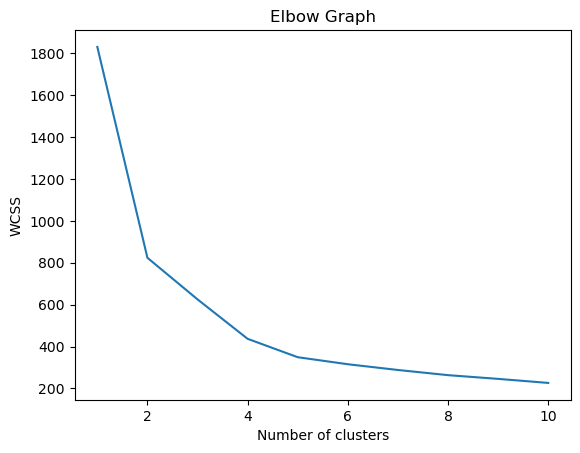

In [77]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Build Cluster algorithm using K=4

In [78]:
clusters4=KMeans(4,random_state=30).fit(airlines_N)
clusters4

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=30)

In [79]:
clusters4.labels_

array([1, 1, 1, ..., 3, 1, 1])

In [80]:
# Assign clusters to the data set
air4=air2.copy()
air4['clusters4_id']=clusters4.labels_
air4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters4_id
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [81]:
# Compute the centroids for K=4 clusters with 11 variables
clusters4.cluster_centers_

array([[ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 2.39011667e-02,  8.28362120e-03,  2.31945177e-02,
         8.96151819e-03,  1.05429626e-03,  1.26482465e-02,
         7.54496083e-02,  7.35308092e-03,  1.24327389e-02,
         4.36111859e-01,  7.21644966e-16],
       [ 6.92335936e-02,  6.55837114e-03,  6.44122383e-01,
         8.05152979e-04,  5.63607085e-03,  1.18636504e-01,
         2.00595439e-01,  7.31260853e-03,  1.19405706e-02,
         5.34640411e-01, -2.77555756e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00]])

In [82]:
# Group data by Clusters (K=4)
air4.groupby('clusters4_id').agg(['mean']).reset_index()

,clusters4_id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
1,1,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0.0
2,2,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0.0
3,3,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0


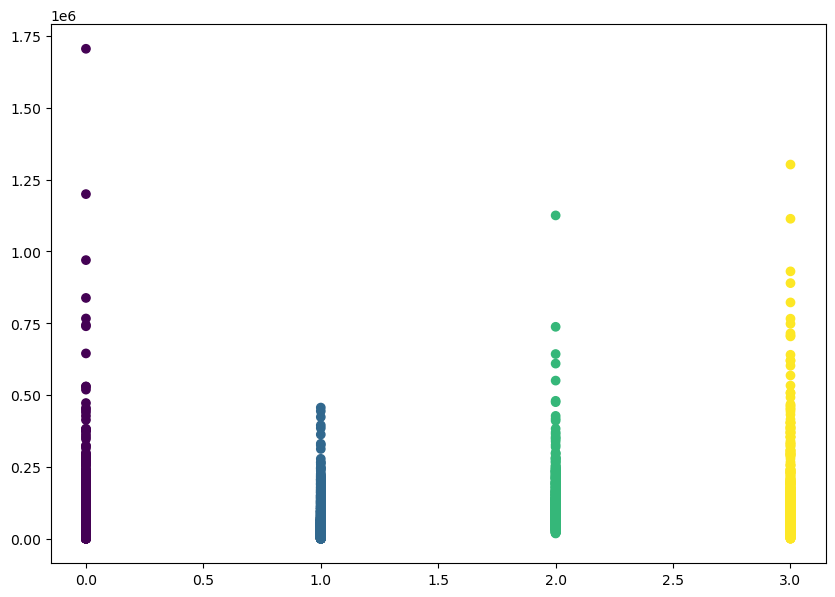

In [83]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(air4['clusters4_id'],air4['Balance'], c=clusters4.labels_) 

### Build Cluster algorithm using K=5

In [85]:
clusters5=KMeans(5,random_state=30).fit(airlines_N)
clusters5

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=30)

In [86]:
clusters5.labels_

array([4, 4, 4, ..., 3, 0, 0])

In [87]:
# Assign clusters to the data set
air5=air2.copy()
air5['clusters5_id']=clusters5.labels_
air5.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters5_id
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,4
2,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,14776,0,1,1,1,500,1,0,0,6952,0,4
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [88]:
# Compute the centroids for K=5 clusters with 11 variables
clusters5.cluster_centers_

array([[ 1.94103660e-02,  8.43565288e-03,  1.76669894e-02,
         8.22846079e-03,  1.69409487e-03,  1.23106384e-02,
         7.18386276e-02,  6.90024091e-03,  1.13792033e-02,
         2.40189960e-01, -3.88578059e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -3.33066907e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 2.92977490e-02,  8.07381776e-03,  3.05651672e-02,
         9.80392157e-03,  2.88350634e-04,  1.31422452e-02,
  

In [89]:
# Group data by Clusters (K=5)
air5.groupby('clusters5_id').agg(['mean']).reset_index()

,clusters5_id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0
1,1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
2,2,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0
3,3,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
4,4,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0


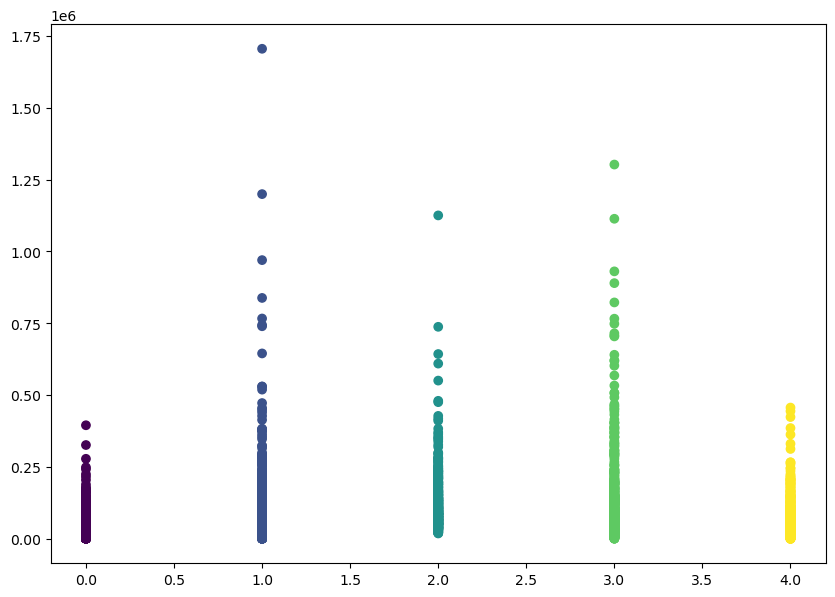

In [90]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(air5['clusters5_id'],air5['Balance'], c=clusters5.labels_) 

## DBSCAN Clustering

In [91]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler().fit(air2)
airlines_norm = scaler.transform(air2)

In [93]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.82, min_samples=6)
dbscan.fit(airlines_norm)

DBSCAN(eps=0.82, min_samples=6)

In [94]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [95]:
a1 = pd.DataFrame(dbscan.labels_,columns=['cluster_id'])
a1.value_counts()

cluster_id
 0            2222
 1             956
-1             801
 2              13
 3               7
dtype: int64